## Exploratory Data Analysis (EDA) 

In [262]:
# importing necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import re

In [21]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
# Read an Excel file and store it in a Pandas DataFrame
odf = pd.read_excel("C:/Users/user/Desktop/Python/Main_Projects/Web_Scraping/Top_Colleges_Aurangabad.xlsx")

In [3]:
# Create a copy of the DataFrame 'odf' and store it in 'df'
df = odf.copy()

In [4]:
# Display information about the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   College_name            300 non-null    object
 1   Courses_Available       300 non-null    object
 2   Established             238 non-null    object
 3   Address                 134 non-null    object
 4   City                    133 non-null    object
 5   Locality                221 non-null    object
 6   Phone                   202 non-null    object
 7   Fax                     107 non-null    object
 8   Email                   300 non-null    object
 9   Affiliations            97 non-null     object
 10  College_Web_Site        166 non-null    object
 11  indcareer_college_link  300 non-null    object
dtypes: object(12)
memory usage: 28.3+ KB


In [5]:
# Locating rows in the DataFrame 'df' where the 'College_name' column contains '[]'
df.loc[df['College_name']=='[]']

,College_name,Courses_Available,Established,Address,City,Locality,Phone,Fax,Email,Affiliations,College_Web_Site,indcareer_college_link
199,[],[],[],[],[],[],[],[],[],[],[],[]
207,[],[],[],[],[],[],[],[],[],[],[],[]


In [6]:
# Remove rows from the DataFrame 'df' where the 'College_name' column contains '[]'
df.drop(df[df['College_name'] == '[]'].index, inplace=True)

In [7]:
df.loc[df['College_name']=='[]']

,College_name,Courses_Available,Established,Address,City,Locality,Phone,Fax,Email,Affiliations,College_Web_Site,indcareer_college_link


In [8]:
df['Courses_Available']

0      ['Bachelor of Medicine and Bachelor of Surgery...
1      ['Bachelor of Arts (BA', 'Bachelor of Commerce...
2      ['Bachelor of Arts (BA', 'Bachelor of Arts (BA...
3      ['Bachelor of Arts (BA', 'Bachelor of Science ...
4      ['Bachelor of Arts (BA', 'Bachelor of Commerce...
                             ...                        
295    ['Bachelor of Computer Science (BCS', 'Diploma...
296            ['Bachelor of Computer Science (BCS', '']
297    ['Bachelor of Computer application (BCA', 'Bac...
298                     ['Bachelor of Science (BSc', '']
299    ['Bachelor of Library and Information Sciences...
Name: Courses_Available, Length: 298, dtype: object

In [9]:
# Remove "['" and "']" from the 'Courses_Available' column in the DataFrame 'df'
df['Courses_Available'] = df['Courses_Available'].str.replace("['","").str.replace("']","")

In [10]:
# Replace '(', "'", and '"' with '- ' in the 'Courses_Available' column of the DataFrame 'df'
df['Courses_Available'] = df['Courses_Available'].str.replace('(','- ').str.replace("'","").str.replace('"','')

In [11]:
# Remove trailing commas and spaces from the 'Courses_Available' column using a regular expression
df['Courses_Available'] = df['Courses_Available'].str.replace(',\s*$', '', regex=True)

In [12]:
df['Courses_Available']

0      Bachelor of Medicine and Bachelor of Surgery -...
1      Bachelor of Arts - BA, Bachelor of Commerce - ...
2      Bachelor of Arts - BA, Bachelor of Arts - BA H...
3      Bachelor of Arts - BA, Bachelor of Science - B...
4      Bachelor of Arts - BA, Bachelor of Commerce - ...
                             ...                        
295    Bachelor of Computer Science - BCS, Diploma Pe...
296                   Bachelor of Computer Science - BCS
297    Bachelor of Computer application - BCA, Bachel...
298                            Bachelor of Science - BSc
299    Bachelor of Library and Information Sciences -...
Name: Courses_Available, Length: 298, dtype: object

In [13]:
# Split the 'City' column by the comma separator, creating 'City' and 'State' columns
df[['City', 'State']] = df['City'].str.split(",", n=1, expand=True)

In [14]:
# Reorder the columns in the DataFrame 'df' based on the 'column_order' list
column_order = ['College_name','Courses_Available','Established','Address','Locality','City','State','Phone','Email','Affiliations','College_Web_Site','indcareer_college_link']

df = df[column_order]

In [18]:
df.head(2)

,College_name,Courses_Available,Established,Address,Locality,City,State,Phone,Email,Affiliations,College_Web_Site,indcareer_college_link
0,"MGM Medical College & Hospital, Aurangabad",Bachelor of Medicine and Bachelor of Surgery -...,1990,"Gate No. 2 , MGM Campus, N-6,CIDCO., City: Aur...",MGM Campus,Aurangabad,"Maharashtra, India","0240-2481437,0240-2482235",mgmmca@themgmgroup.com,Mahatma Gandhi Mission,https://www.mgmmcha.org/,https://www.indcareer.com/maharashtra/aurangab...
1,"Sachchidanand Sinha College, Aurangabad","Bachelor of Arts - BA, Bachelor of Commerce - ...",1943,"Ramdih, Aurangabad, Bihar 824101",Aurangabad,Aurangabad,"Bihar, India","06186- 223133, 09234040501, 09234044860","principa@ssinhacollege.in, abpsinha@ssinhacoll...",Not Specified,https://www.ssinhacollege.co.in/,https://www.indcareer.com/bihar/aurangabad/s-s...


In [19]:
# Fill missing (NaN) values in the DataFrame 'df' with 'Not Specified'
df.fillna('Not Specified', inplace=True)

In [20]:
# Select rows in the DataFrame 'df' where the 'State' column contains 'Bihar'
df[df['State'].str.contains('Bihar')]

,College_name,Courses_Available,Established,Address,Locality,City,State,Phone,Email,Affiliations,College_Web_Site,indcareer_college_link
1,"Sachchidanand Sinha College, Aurangabad","Bachelor of Arts - BA, Bachelor of Commerce - ...",1943,"Ramdih, Aurangabad, Bihar 824101",Aurangabad,Aurangabad,"Bihar, India","06186- 223133, 09234040501, 09234044860","principa@ssinhacollege.in, abpsinha@ssinhacoll...",Not Specified,https://www.ssinhacollege.co.in/,https://www.indcareer.com/bihar/aurangabad/s-s...
2,"Ram Lakhan Singh Yadav College, Aurangabad","Bachelor of Arts - BA, Bachelor of Arts - BA H...",1971,Aurangabad - 824101 Bihar,Aurangabad,Aurangabad,"Bihar, India",06186 - 223244,principal@rlsycollegeaurangabad.in,National Assessment and Accreditation Council ...,http://rlsycollegeaurangabad.in/,https://www.indcareer.com/bihar/aurangabad/ram...
3,"KS Mahila College, Aurangabad","Bachelor of Arts - BA, Bachelor of Science - B...",1978,"Aurangabad, Bihar - 824101",Aurangabad,Aurangabad,"Bihar, India",06186- 292111,ksmcollegeaur123@gmail.com,Not Specified,http://www.ksmcaurangabad.org/,https://www.indcareer.com/bihar/aurangabad/k-s...
4,"Daudnagar College, Daudnagar","Bachelor of Arts - BA, Bachelor of Commerce - ...",1970,"Daudnagar Aurangabad, Bihar 824113",Daudnagar,Aurangabad,"Bihar, India","+91-6328-22084, 9931063965",daudnagarcollege@gmail.com,Not Specified,https://www.daudnagarcollege.org/,https://www.indcareer.com/bihar/aurangabad/dau...
5,"Anugrah Narayan Smarak College, Nabinagar","Bachelor of Arts - BA, Bachelor of Science - BSc",1970,"NabinagarAurangabadBihar, Pin Code - 824301",Nabinagar,Aurangabad,"Bihar, India","06332 – 227213, 9431016899, 072507 73710",anscollegenabinagar@gmail.com,Not Specified,https://www.anscnabinagar.org.in/,https://www.indcareer.com/bihar/aurangabad/anu...
7,"Sityog Institute Of Technology, Aurangabad",Bachelor of Technology - BTech Civil Engineeri...,2009,"Growth Center, Jasoiya More, Aurangabad, Bihar...",Jasoiya More Growth Center,Aurangabad,"Bihar, India",+91-9308392306/ 9102318888/ 9308394144/ 933412...,sityog@gmail.com,All India Council For Technical Education (AIC...,https://www.sityog.edu.in/,https://www.indcareer.com/bihar/aurangabad/sit...
133,"Thakur B D Sinha Janta College, Aurangabad","Bachelor of Arts - BA, Bachelor of Commerce - ...",1979,Not Specified,Goh,Aurangabad,"Bihar, India","06328248240, 09931494890",principaltbdsgoh@yahoo.com,Not Specified,Not Specified,https://www.indcareer.com/bihar/aurangabad/tha...


In [21]:
# Remove rows in the DataFrame 'df' where the 'State' column contains 'Bihar'
df = df[~df['State'].str.contains('Bihar')]

In [22]:
# Reset the index of the DataFrame 'df' and drop the old index column
df.reset_index(drop=True, inplace=True)

In [23]:
df.head()

,College_name,Courses_Available,Established,Address,Locality,City,State,Phone,Email,Affiliations,College_Web_Site,indcareer_college_link
0,"MGM Medical College & Hospital, Aurangabad",Bachelor of Medicine and Bachelor of Surgery -...,1990,"Gate No. 2 , MGM Campus, N-6,CIDCO., City: Aur...",MGM Campus,Aurangabad,"Maharashtra, India","0240-2481437,0240-2482235",mgmmca@themgmgroup.com,Mahatma Gandhi Mission,https://www.mgmmcha.org/,https://www.indcareer.com/maharashtra/aurangab...
1,"ITS Engineering And Management College, Aurang...",Bachelor of Technology - BTech Mechanical Engi...,1997,"Dnyanpeeth Campus,P-5 Near MIDC Office,Behind ...",Near Railway Station,Aurangabad,"Maharashtra, India",0240-2341737,info@itsengg.com,Not Specified,https://itsengg.in/,https://www.indcareer.com/maharashtra/aurangab...
2,"Chhatrapati Shahu College Of Engineering, Aura...",Bachelor of Engineering - BE Mechanical Engine...,1986,"Kanchanwadi, Paithan Road,Aurangabad, MS, Indi...",Paithan Road,Aurangabad,"Maharashtra, India","(0240) 2646363, 2646373, 2646350, 2379012",info@csmssengineering.org/,Chhatrapati Shahu Maharaj Shikshan Sanstha (CS...,https://www.csmssengg.org/,https://www.indcareer.com/maharashtra/aurangab...
3,"Sharadchandraji Pawar Polytechnic College, Aur...","Diploma Computer Engineering - DCE, Diploma Ci...",2008,Near Videocon Company Ltd.Beed by pass Highway...,Beed By Pass Highway,Aurangabad,"Maharashtra, India",0240-2644445,sharadpawarpoly@gmail.com,All India Council For Technical Education (AIC...,http://www.sharadchandrapawarpoly.com/,https://www.indcareer.com/maharashtra/aurangab...
4,"Kamala Nehru Polytechnic Pharmacy, Aurangabad",Diploma in Pharmacy - DPharm,1978,"Post Box No 65, Rauza Bagh,Aurangabad 431001,M...",Rauza Baugh,Aurangabad,"Maharashtra, India",+91 (0240) 2381 307,attarsf@yahoo.com,"Maulana Azad Education Trust, AurangabadPharma...",http://www.kncpa.ac.in/,https://www.indcareer.com/maharashtra/aurangab...


In [24]:
# Split the 'Courses_Available' column by commas and store the result as a list
df['Courses_Available'] = df['Courses_Available'].str.split(',')

In [25]:
# Expand the DataFrame 'df' by creating multiple rows for each value in the 'Courses_Available' column
df = df.explode('Courses_Available')

In [26]:
df.reset_index(drop=True, inplace=True)

In [29]:
# Remove leading and trailing whitespace
df['Courses_Available'] = df['Courses_Available'].str.strip()
df['State'] = df['State'].str.strip()

In [30]:
df

,College_name,Courses_Available,Established,Address,Locality,City,State,Phone,Email,Affiliations,College_Web_Site,indcareer_college_link
0,"MGM Medical College & Hospital, Aurangabad",Bachelor of Medicine and Bachelor of Surgery -...,1990,"Gate No. 2 , MGM Campus, N-6,CIDCO., City: Aur...",MGM Campus,Aurangabad,"Maharashtra, India","0240-2481437,0240-2482235",mgmmca@themgmgroup.com,Mahatma Gandhi Mission,https://www.mgmmcha.org/,https://www.indcareer.com/maharashtra/aurangab...
1,"MGM Medical College & Hospital, Aurangabad",Doctor of Medicine - MD,1990,"Gate No. 2 , MGM Campus, N-6,CIDCO., City: Aur...",MGM Campus,Aurangabad,"Maharashtra, India","0240-2481437,0240-2482235",mgmmca@themgmgroup.com,Mahatma Gandhi Mission,https://www.mgmmcha.org/,https://www.indcareer.com/maharashtra/aurangab...
2,"MGM Medical College & Hospital, Aurangabad",Doctor of Medicine - MD Obstetrics & Gynaecology,1990,"Gate No. 2 , MGM Campus, N-6,CIDCO., City: Aur...",MGM Campus,Aurangabad,"Maharashtra, India","0240-2481437,0240-2482235",mgmmca@themgmgroup.com,Mahatma Gandhi Mission,https://www.mgmmcha.org/,https://www.indcareer.com/maharashtra/aurangab...
3,"MGM Medical College & Hospital, Aurangabad",Master of Surgery - MS,1990,"Gate No. 2 , MGM Campus, N-6,CIDCO., City: Aur...",MGM Campus,Aurangabad,"Maharashtra, India","0240-2481437,0240-2482235",mgmmca@themgmgroup.com,Mahatma Gandhi Mission,https://www.mgmmcha.org/,https://www.indcareer.com/maharashtra/aurangab...
4,"MGM Medical College & Hospital, Aurangabad",Master of Surgery - MS Ophthalmology,1990,"Gate No. 2 , MGM Campus, N-6,CIDCO., City: Aur...",MGM Campus,Aurangabad,"Maharashtra, India","0240-2481437,0240-2482235",mgmmca@themgmgroup.com,Mahatma Gandhi Mission,https://www.mgmmcha.org/,https://www.indcareer.com/maharashtra/aurangab...
...,...,...,...,...,...,...,...,...,...,...,...,...
740,Dhaneshwari Education Trust College of Compute...,Bachelor of Computer Science - BCS,2008,Not Specified,"N-5, CIDCO",Not Specified,Not Specified,Not Specified,N/A,Not Specified,Not Specified,https://www.indcareer.com/maharashtra/aurangab...
741,"Prashik College of BCA BCS, Aurangabad",Bachelor of Computer application - BCA,2008,Not Specified,Satara Parisar,Not Specified,Not Specified,Not Specified,N/A,Not Specified,Not Specified,https://www.indcareer.com/maharashtra/aurangab...
742,"Prashik College of BCA BCS, Aurangabad",Bachelor of Computer Science - BCS,2008,Not Specified,Satara Parisar,Not Specified,Not Specified,Not Specified,N/A,Not Specified,Not Specified,https://www.indcareer.com/maharashtra/aurangab...
743,Rajanitai Patil Mahila College of Computer Sci...,Bachelor of Science - BSc,2008,Not Specified,Dhoot Hospital,Not Specified,Not Specified,Not Specified,N/A,Not Specified,Not Specified,https://www.indcareer.com/maharashtra/aurangab...


In [ ]:
# Export the DataFrame 'df' to an Excel file named 'Top_Colleges_Aurangabad_Transformed.xlsx'
# Data is written to the 'Data' sheet, and the DataFrame index is excluded

df.to_excel('Top_Colleges_Aurangabad_Transformed.xlsx', sheet_name='Data', index=False)

## Data Analysis

### Total Number of colleges by Locality - Top 6

In [62]:
total_Colleges = df.groupby('Locality')['College_name'].nunique().sort_values(ascending=False)
total_Colleges = total_Colleges.reset_index().rename(columns={'College_name' : 'Total_Count'})

In [75]:
total_Colleges['Rank'] = total_Colleges['Total_Count'].rank(ascending=False, method='dense').astype('int')

In [77]:
total_Colleges[total_Colleges['Rank'] <= 6]

,Locality,Total_Count,Rank
0,Not Specified,79,1
1,Paithan Road,9,2
2,Aurangabad,8,3
3,Railway Station Road,5,4
4,Paithan,5,4
5,MGM Campus,5,4
6,Rauza Bagh,4,5
7,Jatwada Road,4,5
8,Satara Parisar,4,5
9,Vaijapur,4,5


### Distribution of Established Year: Analyze the distribution of the year each college was established and identify trends or patterns.

In [159]:
# Grouping the DataFrame 'df' by the 'Established' column and count the number of unique colleges in each year.
colleges_year = df.groupby('Established')['College_name'].nunique().reset_index()
colleges_year.rename(columns={'College_name' : 'Number_Colleges'}, inplace=True)

In [166]:
colleges_year.sample(3)

,Established,Number_Colleges
49,2009,29
44,2006-2007,2
53,2016,1


In [167]:
# Using regular expressions, remove any non-digit characters ('-\d*') from the 'Established' column in the DataFrame
colleges_year['Established'] = colleges_year['Established'].replace('-\d*','',regex=True)

In [168]:
colleges_year.drop(colleges_year[colleges_year['Established']=='Not Specified'].index, inplace=True)

In [169]:
colleges_year.sample(3)

,Established,Number_Colleges
18,1978,2
30,1993,4
50,2009,1


In [170]:
print(f"Min Year : {colleges_year['Established'].min()}")
print(f"Max Year : {colleges_year['Established'].max()}")

Min Year : 1915
Max Year : 2016


In [171]:
# Converting the 'Established' column to an integer data type.
colleges_year['Established'] = colleges_year['Established'].astype('int')

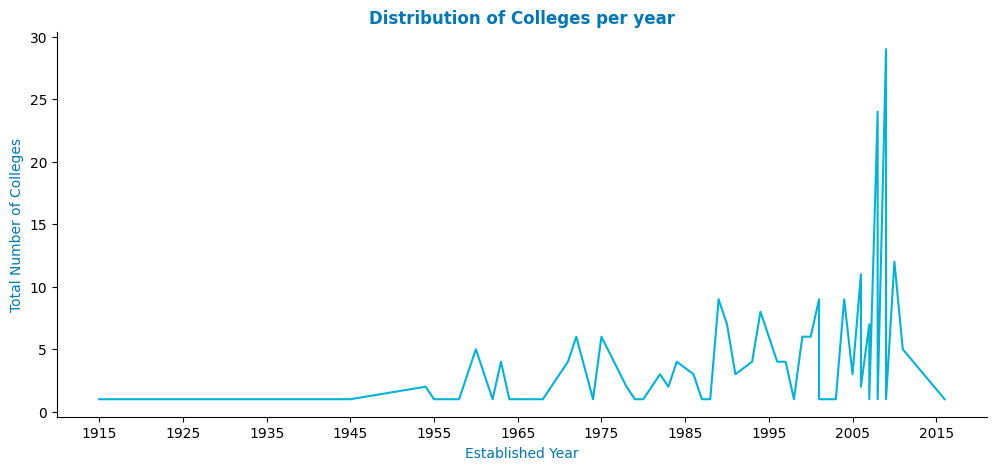

In [158]:
# Ploting the 'Number_Colleges' data against the 'Established' year data
plt.figure(figsize=(12,5))
plt.plot(colleges_year['Established'], colleges_year['Number_Colleges'], color='#00b4d8')

plt.xticks(range(min(colleges_year['Established']), 2021, 10))
plt.title('Distribution of Colleges per year', fontdict={'color' : '#0077b6', 'weight' : 'bold', 'size' : 12})
plt.xlabel('Established Year', fontdict={'color':'#0077b6'})
plt.ylabel('Total Number of Colleges', fontdict={'color':'#0077b6'})

sns.despine()
plt.show()

### Affiliations Analysis: Analyzing the affiliations of colleges and find out which affiliations are most common.

In [187]:
common_affi = df.groupby('Affiliations')['College_name'].nunique().sort_values(ascending=False)
common_affi = common_affi.reset_index().rename(columns={'College_name':'Total Count'})

In [192]:
common_affi['Rank'] = common_affi['Total Count'].rank(ascending=False, method='dense')

In [194]:
common_affi[common_affi['Rank'] <= 7]

,Affiliations,Total Count,Rank
0,Not Specified,198,1.0
1,Mahatma Gandhi Mission,17,2.0
2,All India Council For Technical Education (AIC...,8,3.0
3,National Council of Teacher Education (NCTE),6,4.0
4,Chhatrapati Shahu Maharaj Shikshan Sanstha (CS...,4,5.0
5,"Marathwada Shikshan Prasarak Mandals, Parbhani",3,6.0
6,All India Council For Technical Education (AIC...,3,6.0
7,National Assessment and Accreditation Council ...,3,6.0
8,"Maulana Azad Education Trust, AurangabadAll In...",2,7.0
9,"Everest Educational Society, AurangabadAll In...",2,7.0


### Top Courses Offered: Determining the most popular courses offered by colleges.

In [216]:
common_course = df['Courses_Available'].value_counts().reset_index().sort_values(by='count',ascending=False)
common_course[['Courses_Available','course_name']] = common_course['Courses_Available'].str.split('-', n=1, expand=True)

common_course = common_course[['course_name','count']]
common_course = common_course.head(10)

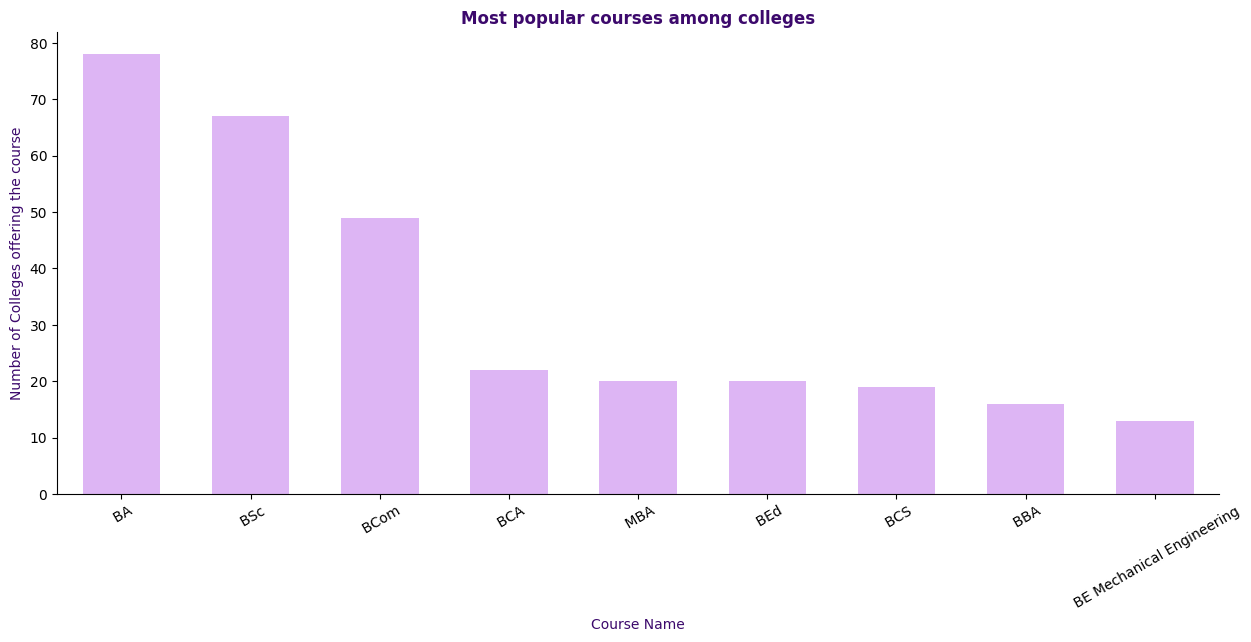

In [242]:
plt.figure(figsize=(15,6))
sns.barplot(x='course_name', y='count', data=common_course, color='#e0aaff', width=0.6)

plt.title('Most popular courses among colleges', fontdict={'color':'#3c096c', 'size':12, 'weight':'bold'})
plt.xlabel('Course Name', fontdict={'color':'#3c096c'})
plt.ylabel('Number of Colleges offering the course', fontdict={'color':'#3c096c'})
plt.xticks(rotation=30)

sns.despine()
plt.show()